<a href="https://colab.research.google.com/github/hhaemin/smart_healthcare/blob/main/RNN%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15, 20)

plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import FinanceDataReader as fdr

In [4]:
# 현대차(005380)
hyundai = fdr.DataReader('005380')

#CJ ENM(035760)
cjenm = fdr.DataReader('035760')

#카카오페이(377300)
kakaopay = fdr.DataReader('377300')

In [7]:
hyundai.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-08-06,8683,8683,8416,8549,47450,NaN
1998-08-07,8550,8617,8483,8483,52510,-0.007720
1998-08-08,8249,8483,8249,8416,21960,-0.007898
1998-08-10,8216,8349,8149,8349,102740,-0.007961
1998-08-11,8483,8683,8283,8483,140000,0.016050


In [8]:
cjenm.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-11-23,56500,56500,56500,56500,623,NaN
1999-11-24,63202,63202,63202,63203,6500,0.118637
1999-11-25,70777,70777,70777,70776,22782,0.119820
1999-11-26,79221,79221,79221,79220,191164,0.119306
1999-11-29,88624,88624,83747,88623,1048545,0.118695


In [9]:
kakaopay.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-11-03,180000,230000,173000,193000,11799881,NaN
2021-11-04,190000,191000,166000,169000,3487030,-0.124352
2021-11-05,167500,179000,167500,170000,1597937,0.005917
2021-11-08,168500,169500,152000,153500,1394625,-0.097059
2021-11-09,153500,157500,146000,147000,892617,-0.042345


In [15]:
hyundai.describe()

,Open,High,Low,Close,Volume,Change
count,6000.000000,6000.000000,6000.000000,6000.000000,6.000000e+03,5999.000000
mean,114878.437000,116533.303167,113196.874833,114849.936167,1.162315e+06,0.000870
std,73518.793158,74365.555981,72574.787883,73448.891289,1.034829e+06,0.027549
min,8133.000000,8168.000000,7922.000000,8027.000000,4.300000e+03,-0.149660
25%,49500.000000,50400.000000,48550.000000,49500.000000,5.608232e+05,-0.013306
50%,115000.000000,116750.000000,113000.000000,115000.000000,9.096720e+05,0.000000
75%,173000.000000,176000.000000,170500.000000,173000.000000,1.469225e+06,0.013699
max,271000.000000,289000.000000,266000.000000,268500.000000,2.677668e+07,0.194175


In [16]:
cjenm.describe()

,Open,High,Low,Close,Volume,Change
count,5661.000000,5661.000000,5661.000000,5661.000000,5.661000e+03,5660.000000
mean,164731.910970,167442.081081,161822.900018,165604.171524,9.008290e+04,0.000485
std,81265.472225,82118.960027,80100.900874,80768.056428,1.126356e+05,0.029671
min,0.000000,0.000000,0.000000,22787.000000,0.000000e+00,-0.149666
25%,109800.000000,112500.000000,107328.000000,110846.000000,2.917500e+04,-0.014955
50%,152500.000000,154706.000000,149890.000000,153000.000000,5.800500e+04,0.000000
75%,214846.000000,218100.000000,211100.000000,215800.000000,1.058590e+05,0.013986
max,426100.000000,431600.000000,415400.000000,426100.000000,1.726347e+06,0.120714


In [17]:
kakaopay.describe()

,Open,High,Low,Close,Volume,Change
count,245.000000,245.000000,245.000000,245.000000,2.450000e+02,244.000000
mean,110010.408163,113091.224490,107223.469388,109852.040816,5.798925e+05,-0.006107
std,48094.608392,50561.090043,46532.225417,48447.595018,9.934088e+05,0.040649
min,33600.000000,34750.000000,32450.000000,33850.000000,8.119600e+04,-0.155660
25%,65300.000000,67300.000000,64200.000000,65200.000000,2.374790e+05,-0.032065
50%,109500.000000,113500.000000,107500.000000,108500.000000,3.688520e+05,-0.005271
75%,144000.000000,147000.000000,141500.000000,143500.000000,5.776520e+05,0.014391
max,240500.000000,248500.000000,216500.000000,238500.000000,1.179988e+07,0.183060


**현대차 시각화**

Text(0.5, 1.0, 'hyundai')

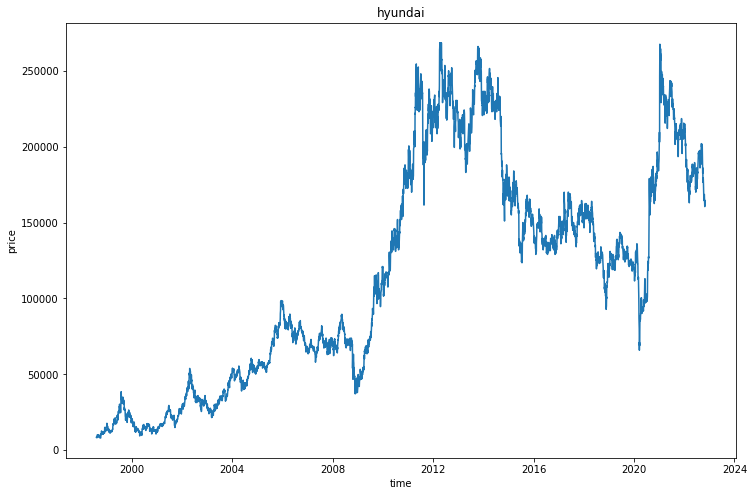

In [21]:
plt.figure(figsize=(12,8))

sns.lineplot(y=hyundai['Close'], x=hyundai.index)
plt.xlabel('time')
plt.ylabel('price')
plt.title('hyundai')


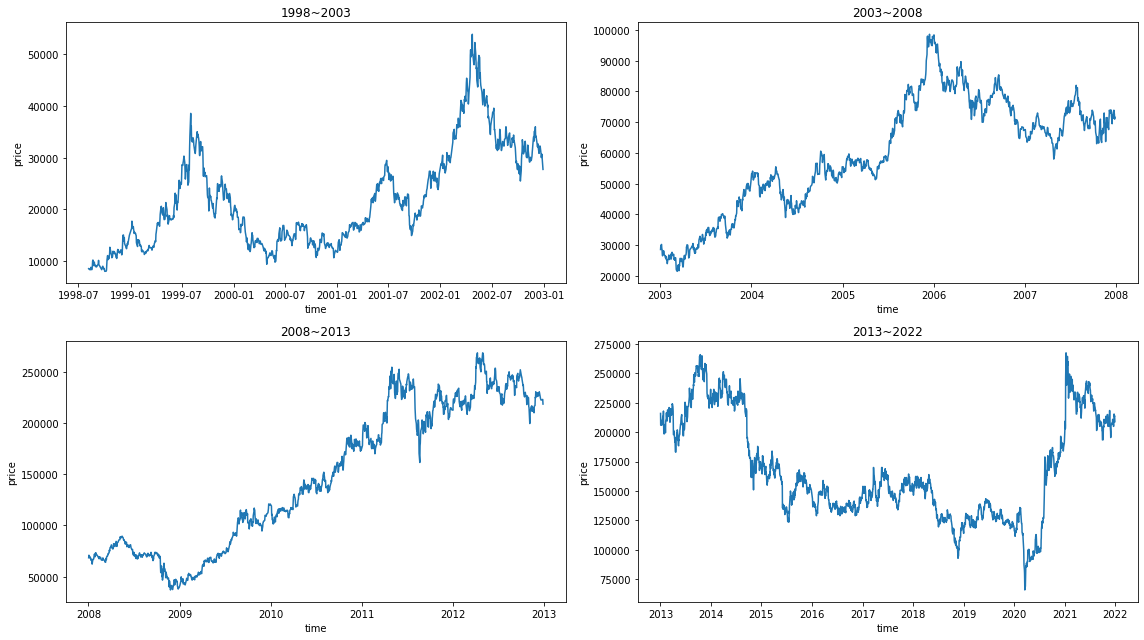

In [26]:
time_steps=[['1998','2003'],
            ['2003','2008'],
            ['2008','2013'],
            ['2013','2022']]

fig, axes = plt.subplots(2,2)
fig.set_size_inches(16,9)
for i in range(4):
  ax = axes[i//2, i%2]
  df = hyundai.loc[(hyundai.index > time_steps[i][0]) & (hyundai.index < time_steps[i][1])]
  sns.lineplot(y=df['Close'], x=df.index, ax=ax)
  ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
  ax.set_xlabel('time')
  ax.set_ylabel('price')
plt.tight_layout()
plt.show()

**cjenm 시각화**

Text(0.5, 1.0, 'cjenm')

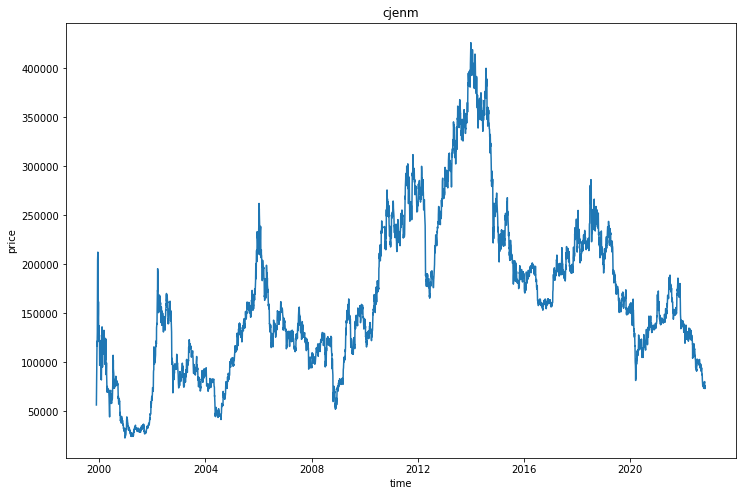

In [23]:
plt.figure(figsize=(12,8))
sns.lineplot(y=cjenm['Close'], x=cjenm.index)
plt.xlabel('time')
plt.ylabel('price')
plt.title('cjenm')


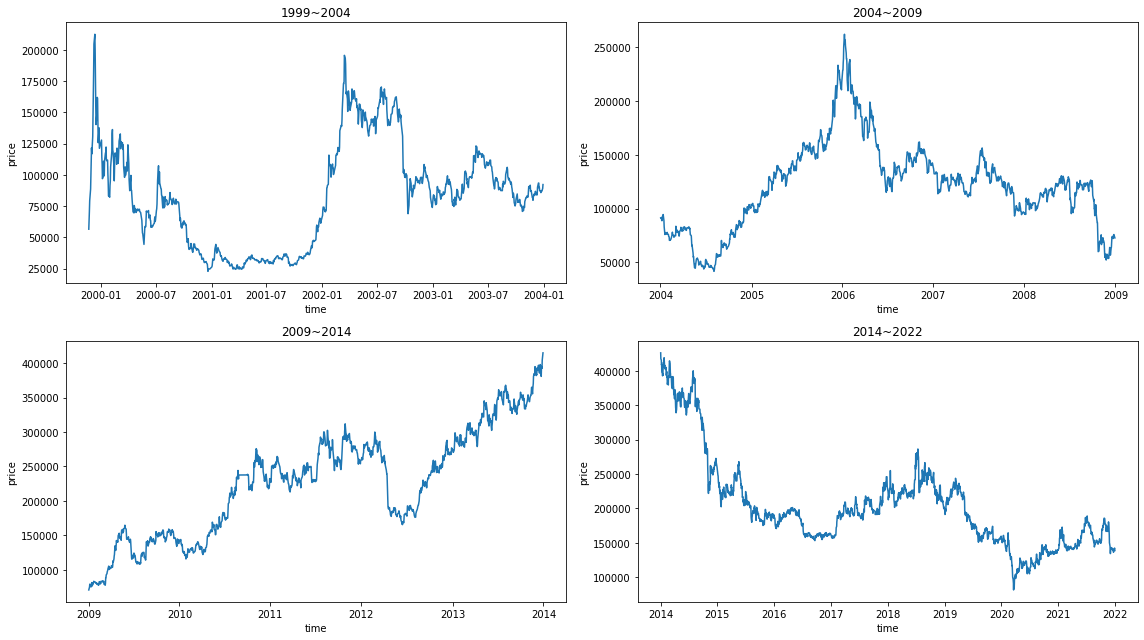

In [27]:
time_steps=[['1999','2004'],
            ['2004','2009'],
            ['2009','2014'],
            ['2014','2022']]

fig, axes = plt.subplots(2,2)
fig.set_size_inches(16,9)
for i in range(4):
  ax = axes[i//2, i%2]
  df = cjenm.loc[(cjenm.index > time_steps[i][0]) & (cjenm.index < time_steps[i][1])]
  sns.lineplot(y=df['Close'], x=df.index, ax=ax)
  ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
  ax.set_xlabel('time')
  ax.set_ylabel('price')
plt.tight_layout()
plt.show()

**kakaopay 시각화**

Text(0.5, 1.0, 'kakaopay')

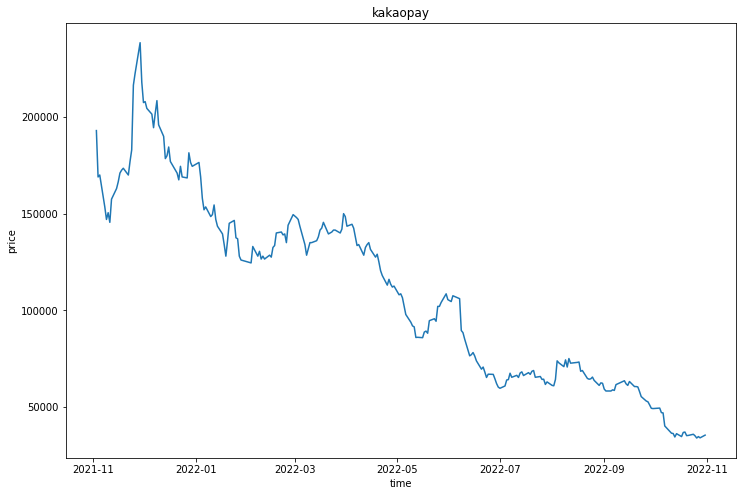

In [24]:
plt.figure(figsize=(12,8))
sns.lineplot(y=kakaopay['Close'], x=kakaopay.index)
plt.xlabel('time')
plt.ylabel('price')
plt.title('kakaopay')

**데이터 전처리**

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scale_cols = ['Open','High','Low','Close','Volume']

hyundai_scaled = scaler.fit_transform(hyundai[scale_cols])
hyundai_scaled

array([[2.09231284e-03, 1.83383660e-03, 1.91414999e-03, 2.00404648e-03,
        1.61173568e-03],
       [1.58635356e-03, 1.59882065e-03, 2.17376142e-03, 1.75066130e-03,
        1.80073643e-03],
       [4.41287800e-04, 1.12166705e-03, 1.26705880e-03, 1.49343694e-03,
        6.59635042e-04],
       ...,
       [5.81537431e-01, 5.53113605e-01, 5.91208859e-01, 5.91128447e-01,
        3.25904159e-02],
       [5.85341637e-01, 5.62015725e-01, 5.95083657e-01, 5.98806786e-01,
        2.79321823e-02],
       [6.00558457e-01, 5.63796149e-01, 5.97021056e-01, 6.00726371e-01,
        2.27040330e-02]])

In [33]:
hyundai = pd.DataFrame(hyundai_scaled, columns=scale_cols)
hyundai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    6000 non-null   float64
 1   High    6000 non-null   float64
 2   Low     6000 non-null   float64
 3   Close   6000 non-null   float64
 4   Volume  6000 non-null   float64
dtypes: float64(5)
memory usage: 234.5 KB


In [37]:
cjenm_scaled = scaler.fit_transform(cjenm[scale_cols])
cjenm_scaled

array([[0.13259798, 0.13090825, 0.13601348, 0.08359016, 0.00036088],
       [0.14832668, 0.14643652, 0.15214733, 0.10021001, 0.00376518],
       [0.1661042 , 0.16398749, 0.17038276, 0.11898699, 0.01319665],
       ...,
       [0.1746069 , 0.17655236, 0.17886375, 0.1324356 , 0.0220732 ],
       [0.17789251, 0.17585728, 0.17814155, 0.12722873, 0.03485916],
       [0.17578033, 0.17354032, 0.17380838, 0.1254931 , 0.04679998]])

In [36]:
cjenm = pd.DataFrame(cjenm_scaled, columns=scale_cols)
cjenm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5661 entries, 0 to 5660
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5661 non-null   float64
 1   High    5661 non-null   float64
 2   Low     5661 non-null   float64
 3   Close   5661 non-null   float64
 4   Volume  5661 non-null   float64
dtypes: float64(5)
memory usage: 221.3 KB


In [38]:
kakaopay_scaled = scaler.fit_transform(kakaopay[scale_cols])
kakaopay_scaled

array([[7.07588207e-01, 9.13450292e-01, 7.63651182e-01, 7.77669191e-01,
        1.00000000e+00],
       [7.55920735e-01, 7.30994152e-01, 7.25618039e-01, 6.60395798e-01,
        2.90632780e-01],
       [6.47172547e-01, 6.74853801e-01, 7.33767998e-01, 6.65282189e-01,
        1.29429283e-01],
       ...,
       [1.93330111e-03, 1.40350877e-03, 4.88997555e-03, 3.66479355e-03,
        2.48995514e-02],
       [2.89995167e-03, 0.00000000e+00, 4.88997555e-03, 4.88639140e-04,
        2.45019812e-02],
       [5.31657806e-03, 4.21052632e-03, 7.60662863e-03, 7.32958710e-03,
        3.90068510e-02]])

In [39]:
kakaopay = pd.DataFrame(kakaopay_scaled, columns=scale_cols)
kakaopay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    245 non-null    float64
 1   High    245 non-null    float64
 2   Low     245 non-null    float64
 3   Close   245 non-null    float64
 4   Volume  245 non-null    float64
dtypes: float64(5)
memory usage: 9.7 KB


**trian/test 분할**

In [40]:
from sklearn.model_selection import train_test_split as tts

In [41]:
hyundai_xtrain, hyundai_xtest, hyundai_ytrain, hyundai_ytest = tts(hyundai.drop('Close',1),hyundai['Close'], test_size=0.2, random_state=0, shuffle=False)
cjenm_xtrain, cjenm_xtest, cjenm_ytrain, cjenm_ytest = tts(cjenm.drop('Close',1),cjenm['Close'], test_size=0.2, random_state=0, shuffle=False)
kakaopay_xtrain, kakaopay_xtest, kakaopay_ytrain, kakaopay_ytest = tts(kakaopay.drop('Close',1),kakaopay['Close'], test_size=0.2, random_state=0, shuffle=False)

In [42]:
hyundai_xtrain.shape, hyundai_ytrain.shape

((4800, 4), (4800,))

In [45]:
hyundai_xtest

,Open,High,Low,Volume
4800,0.545397,0.513944,0.550523,0.016630
4801,0.543495,0.521066,0.552461,0.031539
4802,0.545397,0.519286,0.552461,0.015310
4803,0.554908,0.522846,0.558273,0.011219
4804,0.554908,0.524627,0.560210,0.011097
...,...,...,...,...
5995,0.587244,0.551333,0.589271,0.035991
5996,0.589146,0.554894,0.589271,0.038085
5997,0.581537,0.553114,0.591209,0.032590
5998,0.585342,0.562016,0.595084,0.027932


In [46]:
hyundai_xtrain

,Open,High,Low,Volume
0,0.002092,0.001834,0.001914,0.001612
1,0.001586,0.001599,0.002174,0.001801
2,0.000441,0.001122,0.001267,0.000660
3,0.000316,0.000645,0.000880,0.003677
4,0.001331,0.001834,0.001399,0.005069
...,...,...,...,...
4795,0.575831,0.549553,0.587334,0.016119
4796,0.589146,0.551333,0.589271,0.011684
4797,0.575831,0.544211,0.577647,0.020849
4798,0.570125,0.535309,0.548586,0.045988


**TensroFlow Dataset을 활용한 시퀀스 데이터셋 구성**

In [47]:
import tensorflow as tf

In [48]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

Hyperparameter 정의

In [49]:
WINDOW_SIZE = 20
BATCH_SIZE = 32

In [50]:
hyundaitrain_data = windowed_dataset(hyundai_ytrain, WINDOW_SIZE, BATCH_SIZE, True)
hyundaitest_data = windowed_dataset(hyundai_ytest, WINDOW_SIZE, BATCH_SIZE, False)

cjenmtrain_data = windowed_dataset(cjenm_ytrain, WINDOW_SIZE, BATCH_SIZE, True)
cjenmtest_data = windowed_dataset(cjenm_ytest, WINDOW_SIZE, BATCH_SIZE, False)

kakaopaytrain_data = windowed_dataset(kakaopay_ytrain, WINDOW_SIZE, BATCH_SIZE, True)
kakaopaytest_data = windowed_dataset(kakaopay_ytest, WINDOW_SIZE, BATCH_SIZE, False)

In [51]:
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in hyundaitrain_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


**모델**

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential([
    Conv1D(filters=32, kernel_size=5,
           padding='causal',
           activation='relu',
           input_shape=[WINDOW_SIZE, 1]),
    
    LSTM(16, activation='tanh'),
    Dense(16, activation='relu'),
    Dense(1)
])

In [54]:
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse']) #mean squared error

In [55]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [56]:
hyundai_history = model.fit(hyundaitrain_data, 
                    validation_data=(hyundaitest_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
    148/Unknown - 5s 16ms/step - loss: 8.1816e-04 - mse: 0.0016
Epoch 1: val_loss improved from inf to 0.00058, saving model to tmp/ckeckpointer.ckpt
150/150 [==============================] - 7s 28ms/step - loss: 8.1459e-04 - mse: 0.0016 - val_loss: 5.7663e-04 - val_mse: 0.0012
Epoch 2/50
148/150 [============================>.] - ETA: 0s - loss: 2.0880e-04 - mse: 4.1761e-04
Epoch 2: val_loss improved from 0.00058 to 0.00040, saving model to tmp/ckeckpointer.ckpt
150/150 [==============================] - 3s 19ms/step - loss: 2.0894e-04 - mse: 4.1787e-04 - val_loss: 4.0068e-04 - val_mse: 8.0136e-04
Epoch 3/50
149/150 [============================>.] - ETA: 0s - loss: 1.9573e-04 - mse: 3.9145e-04
Epoch 3: val_loss did not improve from 0.00040
150/150 [==============================] - 3s 22ms/step - loss: 1.9550e-04 - mse: 3.9101e-04 - val_loss: 4.7419e-04 - val_mse: 9.4838e-04
Epoch 4/50
150/150 [==============================] - ETA: 0s - loss: 1.7491e-04 - mse: 3.4981e-04

In [57]:
cjenm_history = model.fit(cjenmtrain_data, 
                    validation_data=(cjenmtest_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
    141/Unknown - 2s 12ms/step - loss: 7.3507e-05 - mse: 1.4701e-04
Epoch 1: val_loss improved from 0.00010 to 0.00005, saving model to tmp/ckeckpointer.ckpt
141/141 [==============================] - 2s 14ms/step - loss: 7.3507e-05 - mse: 1.4701e-04 - val_loss: 5.2336e-05 - val_mse: 1.0467e-04
Epoch 2/50
136/141 [===========================>..] - ETA: 0s - loss: 7.4933e-05 - mse: 1.4987e-04
Epoch 2: val_loss did not improve from 0.00005
141/141 [==============================] - 2s 13ms/step - loss: 7.4970e-05 - mse: 1.4994e-04 - val_loss: 5.6802e-05 - val_mse: 1.1360e-04
Epoch 3/50
136/141 [===========================>..] - ETA: 0s - loss: 6.5882e-05 - mse: 1.3176e-04
Epoch 3: val_loss did not improve from 0.00005
141/141 [==============================] - 2s 14ms/step - loss: 6.6207e-05 - mse: 1.3241e-04 - val_loss: 5.4669e-05 - val_mse: 1.0934e-04
Epoch 4/50
140/141 [============================>.] - ETA: 0s - loss: 7.2289e-05 - mse: 1.4458e-04
Epoch 4: val_loss did not 

In [58]:
kakaopay_history = model.fit(kakaopaytrain_data, 
                    validation_data=(kakaopaytest_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
      5/Unknown - 0s 13ms/step - loss: 2.2897e-04 - mse: 4.5793e-04
Epoch 1: val_loss improved from 0.00005 to 0.00004, saving model to tmp/ckeckpointer.ckpt
6/6 [==============================] - 0s 29ms/step - loss: 2.5156e-04 - mse: 5.0312e-04 - val_loss: 4.0004e-05 - val_mse: 8.0008e-05
Epoch 2/50
1/6 [====>.........................] - ETA: 0s - loss: 2.2446e-04 - mse: 4.4891e-04
Epoch 2: val_loss improved from 0.00004 to 0.00004, saving model to tmp/ckeckpointer.ckpt
6/6 [==============================] - 0s 19ms/step - loss: 2.4970e-04 - mse: 4.9941e-04 - val_loss: 3.5414e-05 - val_mse: 7.0829e-05
Epoch 3/50
1/6 [====>.........................] - ETA: 0s - loss: 2.4192e-04 - mse: 4.8384e-04
Epoch 3: val_loss did not improve from 0.00004
6/6 [==============================] - 0s 15ms/step - loss: 2.5318e-04 - mse: 5.0637e-04 - val_loss: 8.9998e-05 - val_mse: 1.8000e-04
Epoch 4/50
1/6 [====>.........................] - ETA: 0s - loss: 1.7870e-04 - mse: 3.5739e-04
Epoch 4

In [59]:
hyundai_pred = model.predict(hyundaitest_data)

37/37 [==============================] - 1s 6ms/step


In [60]:
cjenm_pred = model.predict(cjenmtest_data)

35/35 [==============================] - 0s 6ms/step


In [61]:
kakaopay_pred = model.predict(kakaopaytest_data)

1/1 [==============================] - 0s 55ms/step


**현대차 예측 데이터 시각화**

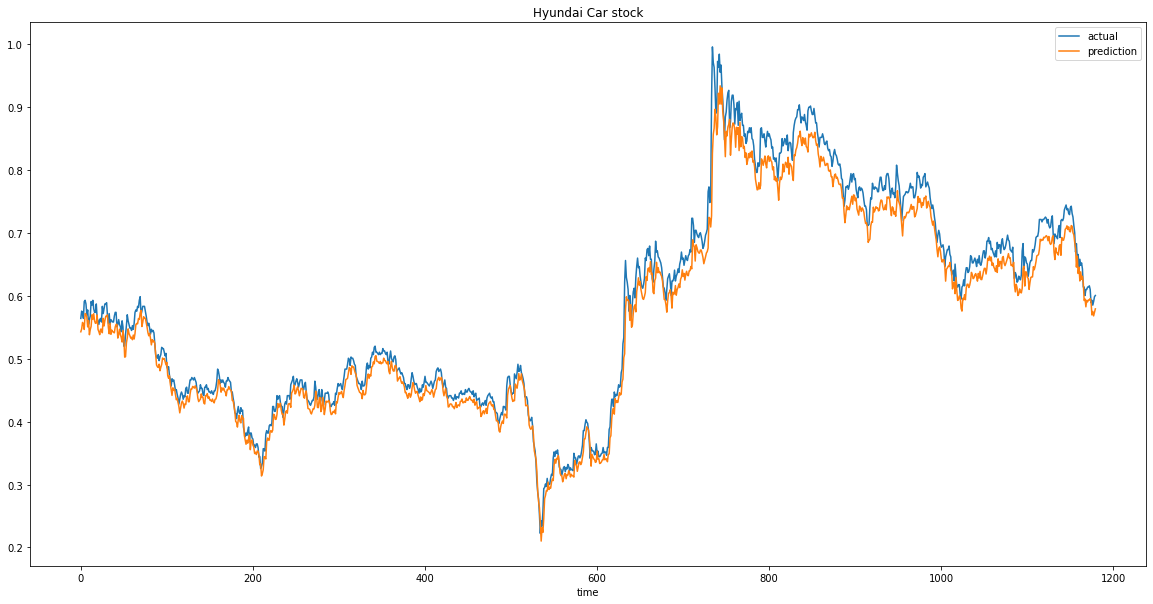

In [65]:
plt.figure(figsize=(20, 10))
plt.plot(np.asarray(hyundai_ytest)[20:], label='actual')
plt.plot(hyundai_pred, label='prediction')
plt.title('Hyundai Car stock')
plt.xlabel('time')
plt.legend()
plt.show()

**cjenm 예측 데이터 시각화**

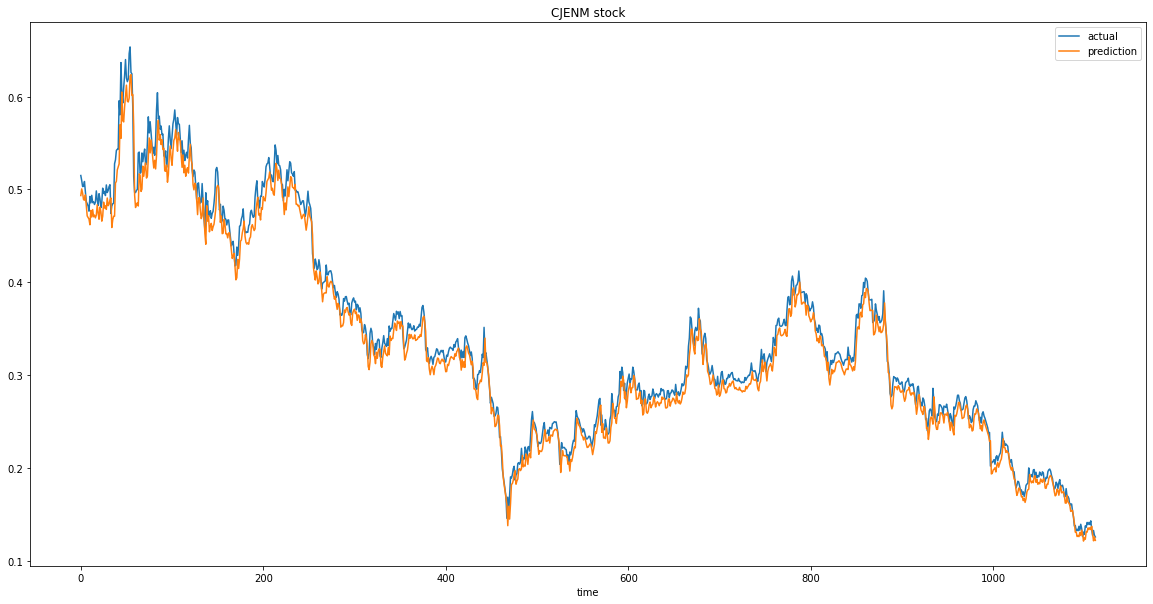

In [63]:
plt.figure(figsize=(20, 10))
plt.plot(np.asarray(cjenm_ytest)[20:], label='actual')
plt.plot(cjenm_pred, label='prediction')
plt.title('CJENM stock')
plt.xlabel('time')
plt.legend()
plt.show()

**kakaopay 예측 데이터 시각화** 

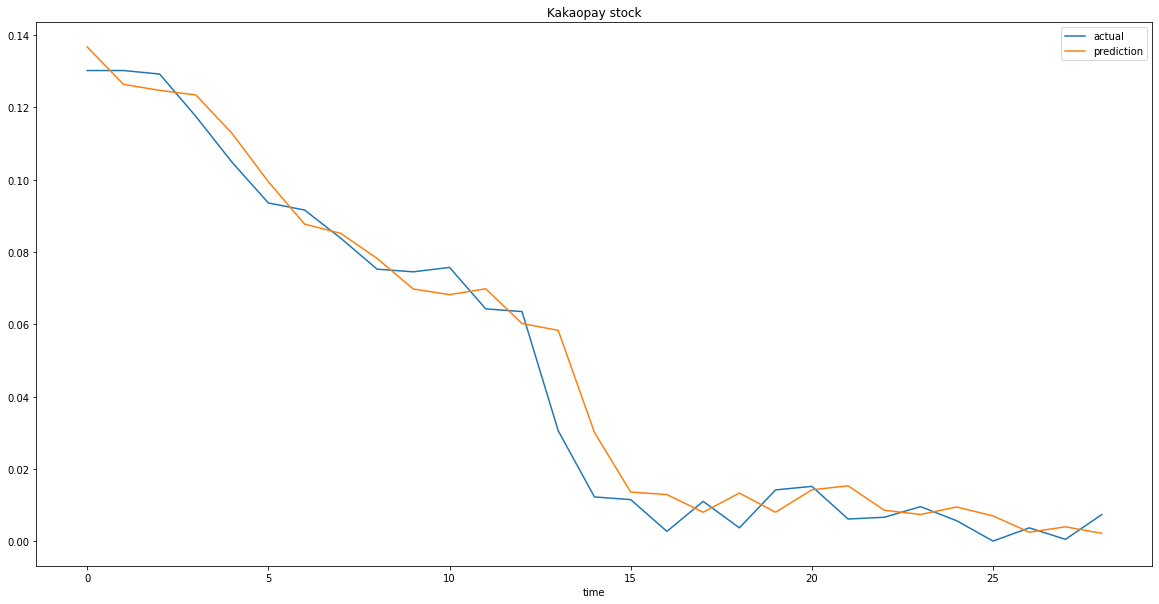

In [64]:
plt.figure(figsize=(20, 10))
plt.plot(np.asarray(kakaopay_ytest)[20:], label='actual')
plt.plot(kakaopay_pred, label='prediction')
plt.title('Kakaopay stock')
plt.xlabel('time')
plt.legend()
plt.show()